In [31]:
!pip3 install dill
import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
from constants import *
import math
import seaborn as sns
import random
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import dill
# dill.load_session('../Weights/HMM_GaussianHMM_5points_RNASeq.db')

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
def plot_BIC(list_k, BIC_score):
    fig = plt.subplot(111)
    plt.plot(list_k, BIC_score, marker='o')  
    plt.xlabel('Value of K')
    plt.ylabel('Objective')
    plt.title('BIC')
    plt.show() 
    
def BIC(model,X,lengths):
    LogLikelihood = model.score(X,lengths)
    num_hidden_states = model.n_components
    # D counts transition matrix (emission estimated by PDF), means = num_hidden_states  
    # covariance matrix = num_hidden_states
    D = num_hidden_states**2-num_hidden_states + 2*num_hidden_states
    BIC = LogLikelihood - (D/2)*np.log(len(X))
    return BIC
    
def BIC_array(HMM_array,X_i):
    BIC_total = 0
    for i in range(len(X_i)):
        model = HMM_array[i]
        X, lengths = conversion_list_of_list(X_i[i],DIMENSION)
        BIC_total+= BIC(model,X,lengths)
    return BIC_total

In [38]:
list_k = range(2,21)
BIC_scores = [-17134.181600733245, -10229.409628636951, -6456.5184489873445, -3904.255440235953, -2689.884030858023, 1052.4048045158565, 2245.590119895258, 4264.377792187164, 5118.175862743638, 5851.19811202395, 7068.4160893492635, 7595.664842768572, 8139.540594219109, 8879.075785591296, 10073.56479025386, 9679.66643063029, 10876.987888890082, 11765.5156757467, 12446.84097136109]
# for idx in range(len(X_i_K_ARRAYS)):
#     model = HMM_K_ARRAYS[idx]
#     X = X_i_K_ARRAYS[idx]
#     BIC_scores.append(BIC_array(model,X))

In [40]:
for idx,i in enumerate(BIC_scores):
    print(idx+2,i)

2 -17134.181600733245
3 -10229.409628636951
4 -6456.5184489873445
5 -3904.255440235953
6 -2689.884030858023
7 1052.4048045158565
8 2245.590119895258
9 4264.377792187164
10 5118.175862743638
11 5851.19811202395
12 7068.4160893492635
13 7595.664842768572
14 8139.540594219109
15 8879.075785591296
16 10073.56479025386
17 9679.66643063029
18 10876.987888890082
19 11765.5156757467
20 12446.84097136109


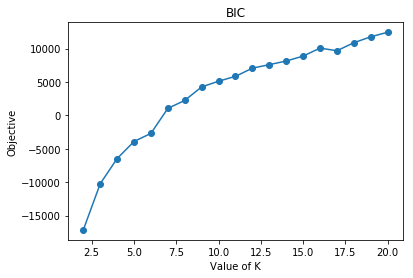

In [39]:
plot_BIC(list_k,BIC_scores)

In [ ]:
def plot_cluster(X,count):
    fig = plt.subplot(111)
    axes = plt.gca()
    axes.set_ylim([0,10])
    var_plot_list = ['TE0','TE1','TE2','TE3','TE4']#['cdRPKM0','cdRPKM1','cdRPKM2','cdRPKM3','cdRPKM4']
    total=0
    for i in range(len(X)):
        fig.plot(var_plot_list, X[i])
        total+=1
    title = "HMM "+ str(count)+" : " + str(total) + " points "
    plt.title(title)
#     plt.savefig('RPKMoutput/Clusters/5points/TE/HMM'+str(count)+'.png')
    plt.show()

In [ ]:
for idx,X in enumerate(X_i_K_ARRAYS[6]):
    plot_cluster(X,idx+1)

In [ ]:
def plot_heatmap(X,idx):
    plt.figure()
    sns.heatmap(X,vmin=0, vmax=10)
    plt.title('Heatmap'+str(idx))
#     plt.savefig('RPKMoutput/Clusters/5points/TE/Heatmap'+str(idx+1)+'.png')
    plt.show()

In [ ]:
for idx,X in enumerate(X_i_K_ARRAYS[9]):
    plot_heatmap(X,idx)

In [ ]:
X_model=X_i_K_ARRAYS[0]

In [ ]:
df = pd.read_csv('RPKMOutput/TE.txt', sep=" ", na_values=['-'])
df = df.dropna()
df = df[['AccNum','GeneName','TE0','TE1','TE2','TE3','TE4']]

In [ ]:
df.head()

In [ ]:
# df[['TE0','TE1','TE2','TE3','TE4']] = df[['TE0','TE1','TE2','TE3','TE4']].apply(lambda x: np.log2(x))


In [ ]:
for idx,x in enumerate(X_model):
    genes=[]
    acc_nums=[]
    for row in x:
        temp = (df.loc[(df['TE0'] == row[0])& (df['TE1']== row[1]) & (df['TE2']== row[2]) & (df['TE3']== row[3]) & (df['TE4']== row[4])])
        if(not temp.empty):
            genes.append(temp['GeneName'].values[0])
            acc_nums.append(temp['AccNum'].values[0])
    print(len(x),len(genes))
    with open('RPKMoutput/Clusters/5points/TE/GO/Gene'+str(idx+1)+'.txt','w') as f:
        for gene in genes:
            f.write("%s\n" % gene)
    with open('RPKMoutput/Clusters/5points/TE/GO/AccNum'+str(idx+1)+'.txt','w') as f:
        for acc_num in acc_nums:
            f.write("%s\n" % acc_num)